In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_excel('data.xlsx')
print("Dataset loaded. Shape:", df.shape)

Dataset loaded. Shape: (16857, 29)


In [3]:
# Parse timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.dayofweek

In [4]:
# Basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16857 non-null  datetime64[ns]
 1   equipment_energy_consumption  16013 non-null  object        
 2   lighting_energy               16048 non-null  object        
 3   zone1_temperature             15990 non-null  object        
 4   zone1_humidity                16056 non-null  object        
 5   zone2_temperature             16004 non-null  object        
 6   zone2_humidity                15990 non-null  float64       
 7   zone3_temperature             16055 non-null  float64       
 8   zone3_humidity                15979 non-null  float64       
 9   zone4_temperature             16041 non-null  float64       
 10  zone4_humidity                16076 non-null  float64       
 11  zone5_temperature           

In [5]:
# Missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 timestamp                         0
equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_vari

In [6]:
# Target distribution
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')  # Convert to numeric, invalid values become NaN
df.dropna(subset=['equipment_energy_consumption'], inplace=True)  # Drop rows with NaN in 'equipment_energy_consumption'

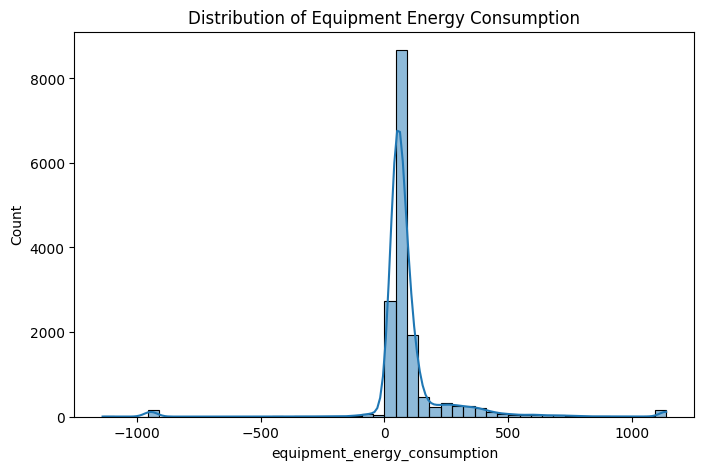

In [7]:
# Continue with your plotting code
plt.figure(figsize=(8,5))
sns.histplot(df['equipment_energy_consumption'], bins=50, kde=True)
plt.title("Distribution of Equipment Energy Consumption")
plt.show()

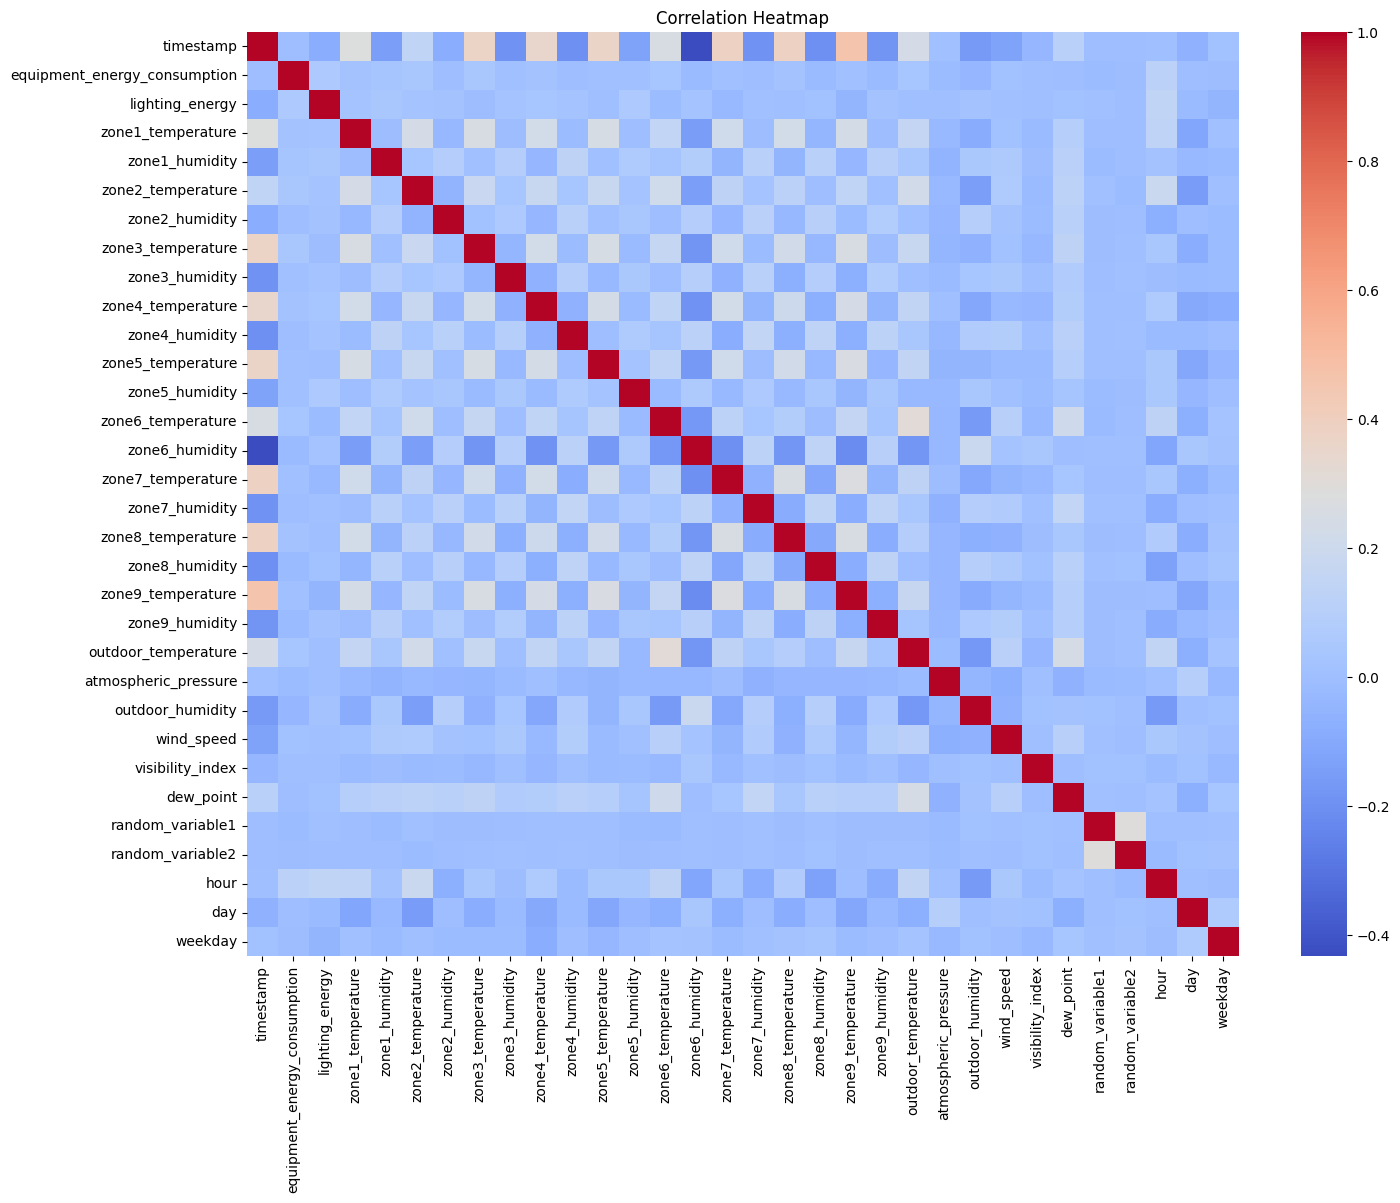

In [8]:
# Correlation heatmap
plt.figure(figsize=(16,12))
# Convert all columns to numeric, invalid values become NaN
numeric_df = df.apply(pd.to_numeric, errors='coerce')
# Drop columns with all NaN values
numeric_df = numeric_df.dropna(axis=1, how='all')
# Calculate correlation matrix
corr = numeric_df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [9]:
# High correlations with target
target_corr = corr['equipment_energy_consumption'].sort_values(ascending=False)
print("Top correlations with target:\n", target_corr.head(10))

Top correlations with target:
 equipment_energy_consumption    1.000000
hour                            0.120745
lighting_energy                 0.057007
zone2_temperature               0.042058
zone3_temperature               0.038033
outdoor_temperature             0.033223
zone6_temperature               0.032136
zone1_humidity                  0.026997
zone8_temperature               0.019716
zone1_temperature               0.018402
Name: equipment_energy_consumption, dtype: float64


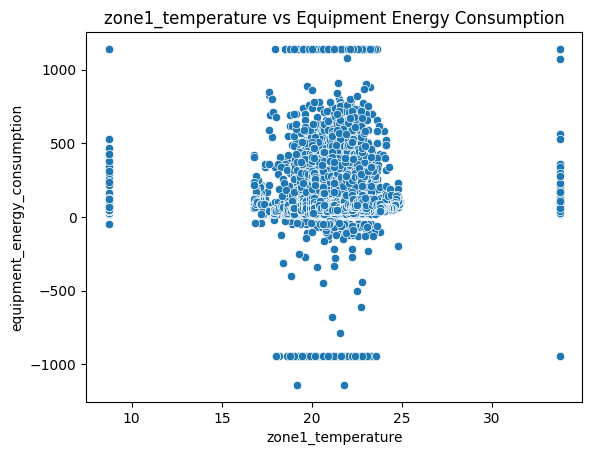

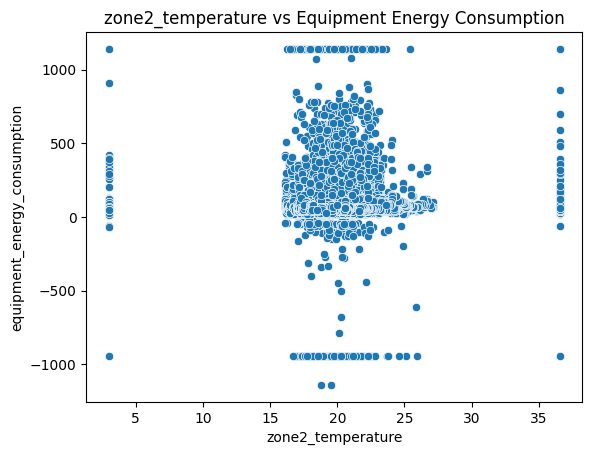

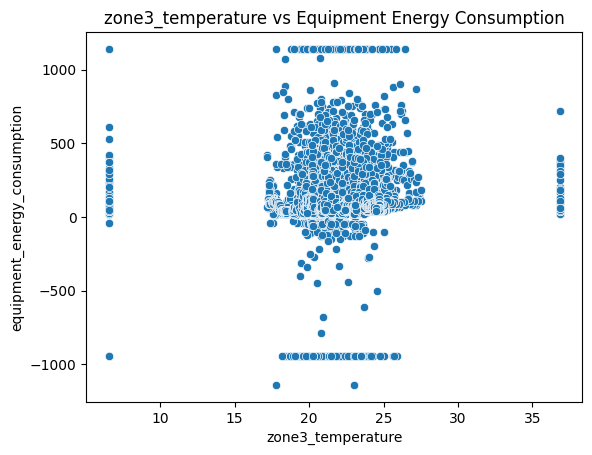

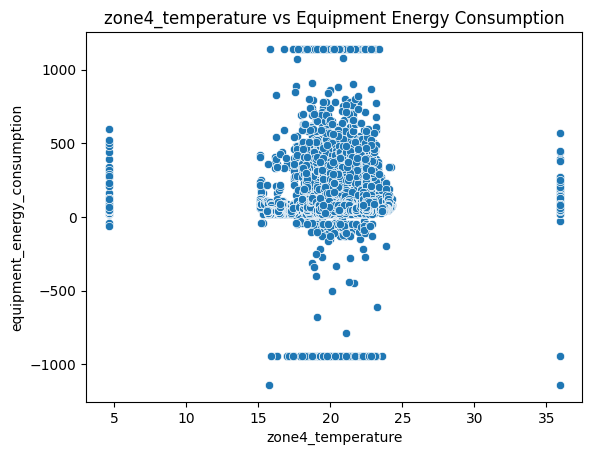

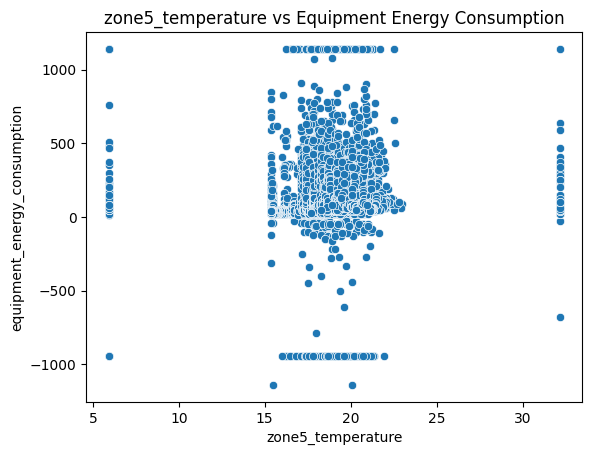

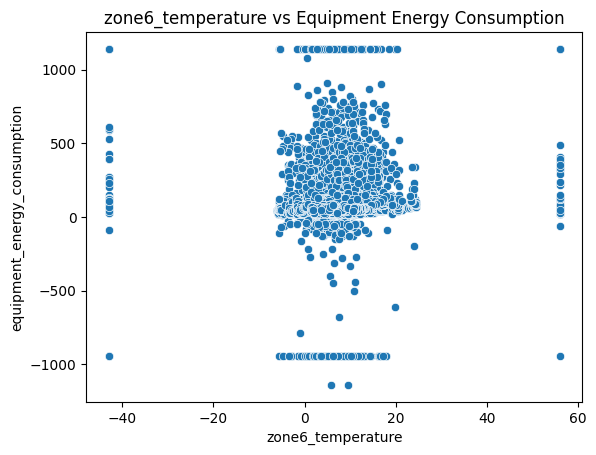

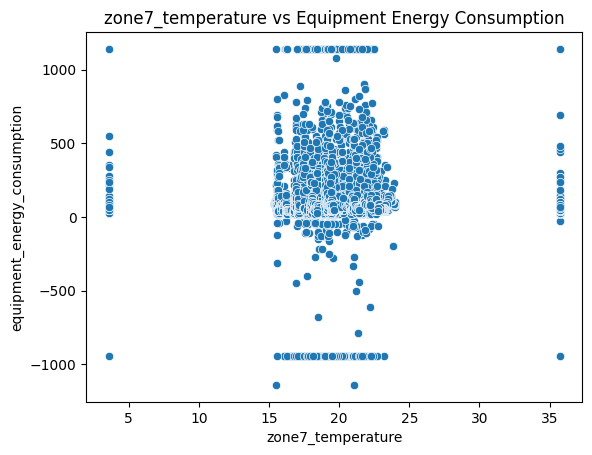

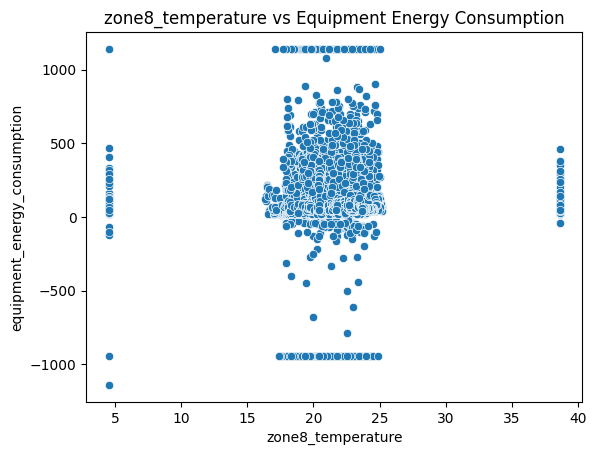

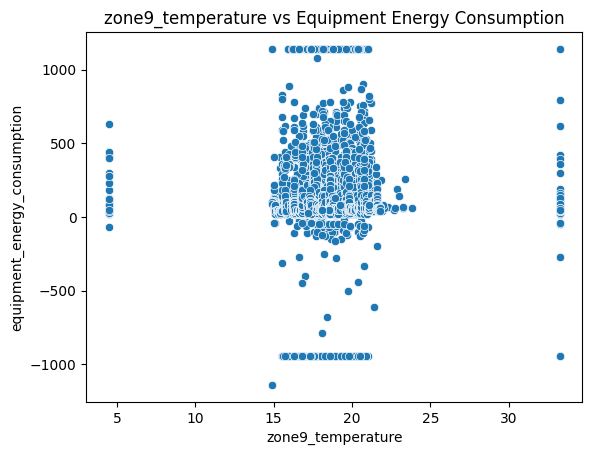

In [10]:
# Zone-wise temperature vs energy
zone_temp_cols = [col for col in df.columns if 'temperature' in col and 'zone' in col]
for col in zone_temp_cols:
    # Convert the column to numeric, replacing errors with NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Drop rows with NaN in the current zone temperature column
    df.dropna(subset=[col], inplace=True)

    sns.scatterplot(data=df, x=col, y='equipment_energy_consumption')
    plt.title(f"{col} vs Equipment Energy Consumption")
    plt.show()

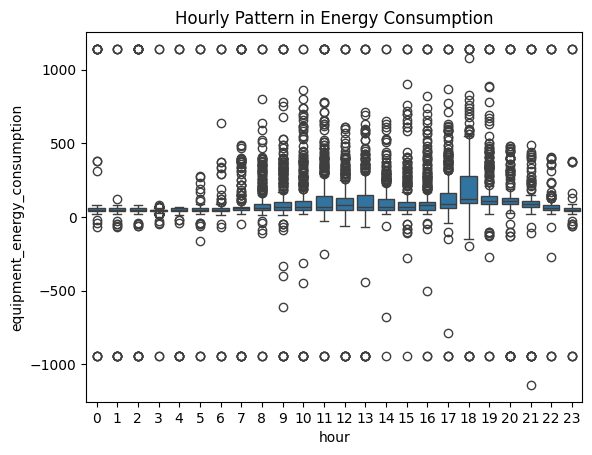

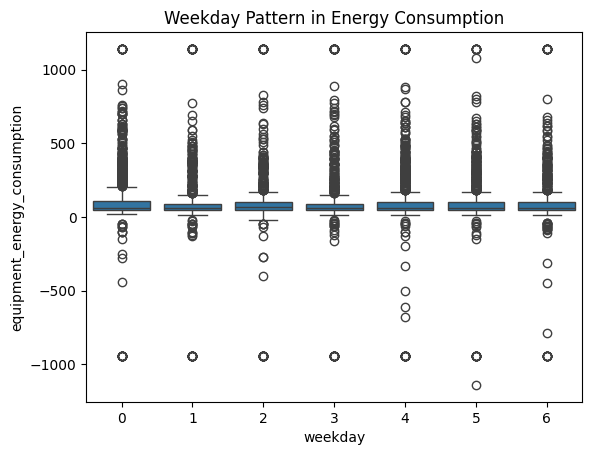

In [11]:
# Boxplots for time-based patterns
sns.boxplot(x='hour', y='equipment_energy_consumption', data=df)
plt.title("Hourly Pattern in Energy Consumption")
plt.show()

sns.boxplot(x='weekday', y='equipment_energy_consumption', data=df)
plt.title("Weekday Pattern in Energy Consumption")
plt.show()

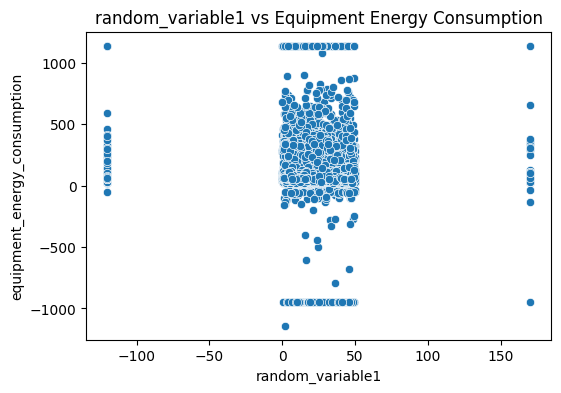

Correlation with target (random_variable1): -0.01867740461609993


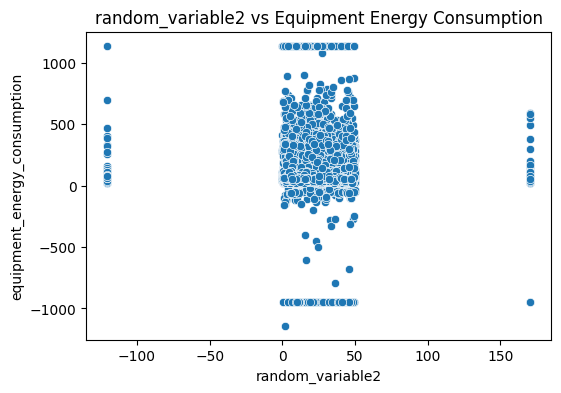

Correlation with target (random_variable2): -0.014929646421526058


In [12]:
# Random variable evaluation
for var in ['random_variable1', 'random_variable2']:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=var, y='equipment_energy_consumption')
    plt.title(f"{var} vs Equipment Energy Consumption")
    plt.show()
    print(f"Correlation with target ({var}):", df[var].corr(df['equipment_energy_consumption']))


Skewness: nan
Kurtosis: nan


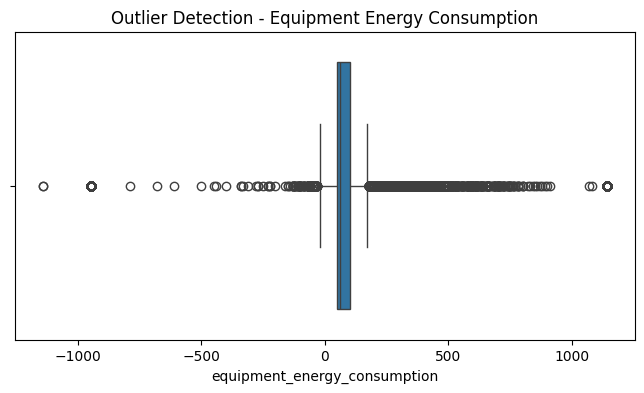

                 feature       VIF
26                 month  2.494954
13     zone9_temperature  1.326806
8         zone6_humidity  1.295370
15   outdoor_temperature  1.278059
11     zone8_temperature  1.233695
7      zone6_temperature  1.225933
9      zone7_temperature  1.223693
5      zone5_temperature  1.211338
20             dew_point  1.210092
3      zone4_temperature  1.208821
1      zone3_temperature  1.202643
24                   day  1.174781
23                  hour  1.144346
4         zone4_humidity  1.131631
12        zone8_humidity  1.130107
17      outdoor_humidity  1.118754
10        zone7_humidity  1.111252
21      random_variable1  1.091340
14        zone9_humidity  1.090019
22      random_variable2  1.089395
18            wind_speed  1.076472
2         zone3_humidity  1.073144
0         zone2_humidity  1.060522
6         zone5_humidity  1.040488
16  atmospheric_pressure  1.035787
25               weekday  1.024819
19      visibility_index  1.007098


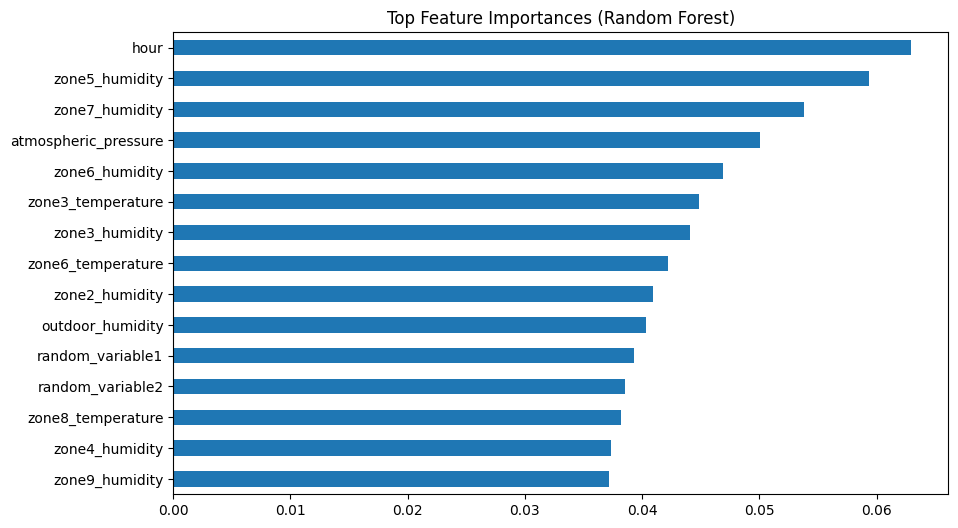

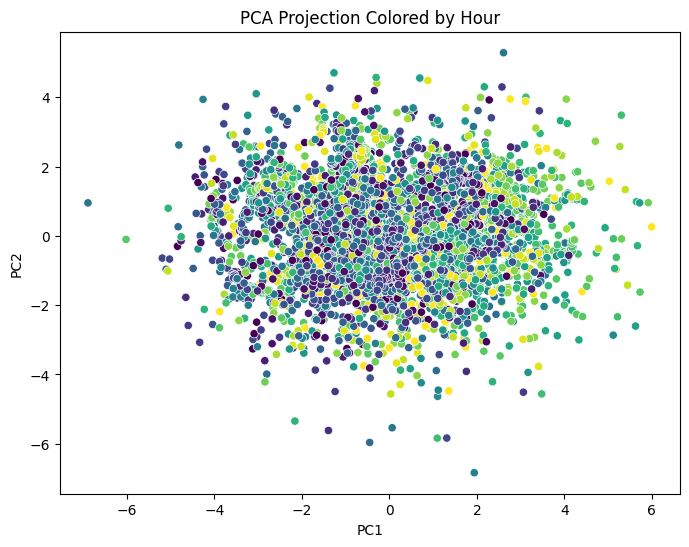

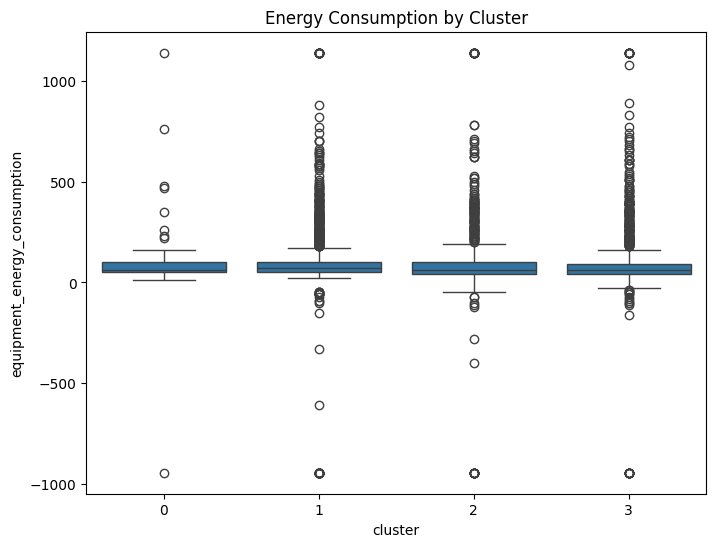

<ipython-input-14-22f714749d57>:100: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_ts = df.set_index('timestamp').resample('H')[target].mean().dropna()
<ipython-input-14-22f714749d57>:103: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_ts = df_ts.asfreq('H')  # or df_ts.asfreq('1H')


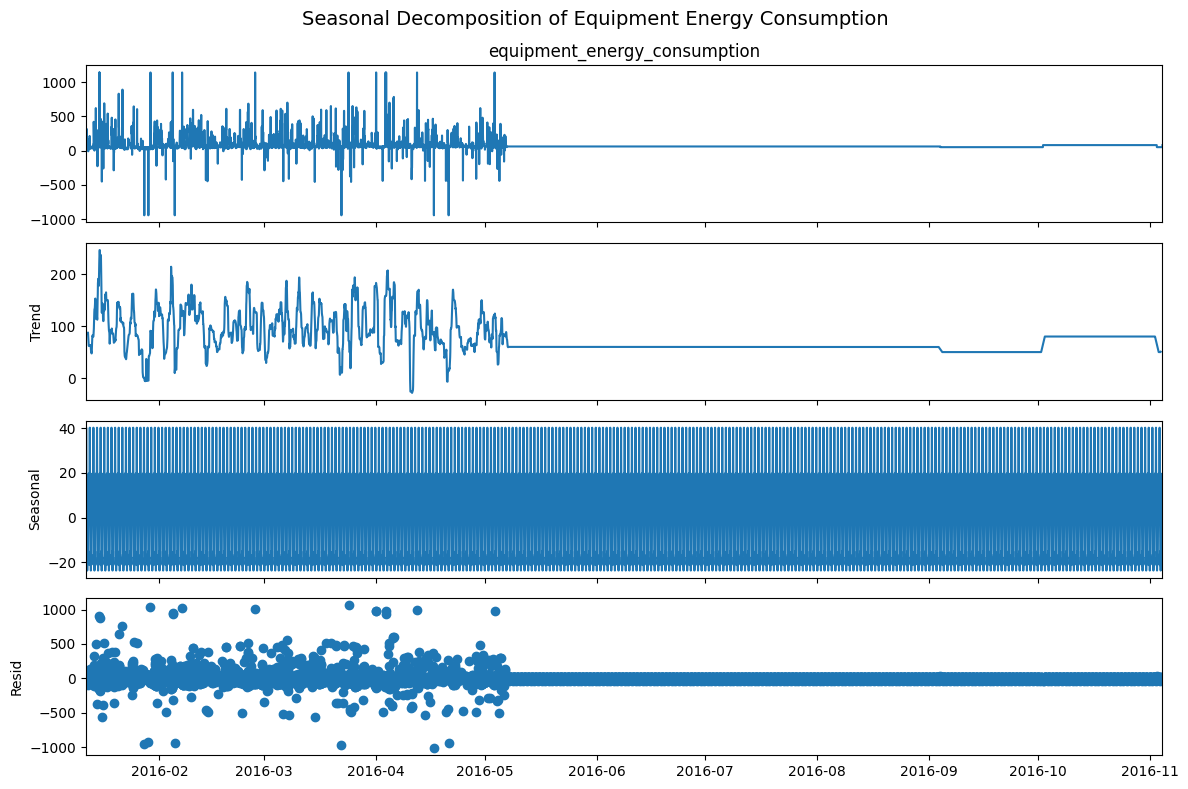

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, pearsonr
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import statsmodels.api as sm

# Load and parse timestamp
df = pd.read_excel('data.xlsx')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month

# Define the target variable
target = 'equipment_energy_consumption' # Defining the target variable

# Skewness & Kurtosis
print(f"Skewness: {skew(df[target])}")
print(f"Kurtosis: {kurtosis(df[target])}")

# --- 2. Outlier Detection ---
# Convert 'equipment_energy_consumption' to numeric, replace errors with NaN
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')
# Remove rows with 'error' in 'equipment_energy_consumption' column
df = df[df['equipment_energy_consumption'] != 'error']
# Drop rows with NaN in 'equipment_energy_consumption' if any exist after removing 'error'
df.dropna(subset=['equipment_energy_consumption'], inplace=True)

# Now proceed with your plotting code:
plt.figure(figsize=(8,4))
sns.boxplot(x=df[target]) # Using target variable defined earlier
plt.title("Outlier Detection - Equipment Energy Consumption")
plt.show()


# --- 4. Multicollinearity Check ---
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical features and drop the target variable
X = df.select_dtypes(include=np.number).drop(columns=[target])

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with any missing values
X = X.dropna()

# Update df to keep only rows in X
df = df.loc[X.index]

# Now proceed with scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif.sort_values(by="VIF", ascending=False))


# --- 6. Feature Importance via Random Forest ---
features = df.select_dtypes(include=np.number).drop(columns=[target]).columns
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(df[features], df[target])
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.head(15).plot(kind='barh')
plt.title("Top Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

# --- 7. PCA for Dimensionality Insight ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['hour'], palette='viridis', legend=False)
plt.title("PCA Projection Colored by Hour")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# --- 8. Clustering (KMeans) Insight ---
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.boxplot(x='cluster', y=target, data=df)
plt.title("Energy Consumption by Cluster")
plt.show()

# --- 9. Time Series Decomposition (Trend/Seasonality) ---
df_ts = df.set_index('timestamp').resample('H')[target].mean().dropna()

# Force the frequency to be hourly if it's not already set
df_ts = df_ts.asfreq('H')  # or df_ts.asfreq('1H')

# Fill missing values using forward fill
df_ts = df_ts.ffill()

decomposition = sm.tsa.seasonal_decompose(df_ts, model='additive')
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle("Seasonal Decomposition of Equipment Energy Consumption", fontsize=14)
plt.tight_layout()
plt.show()

In [15]:
!pip install scikit-learn

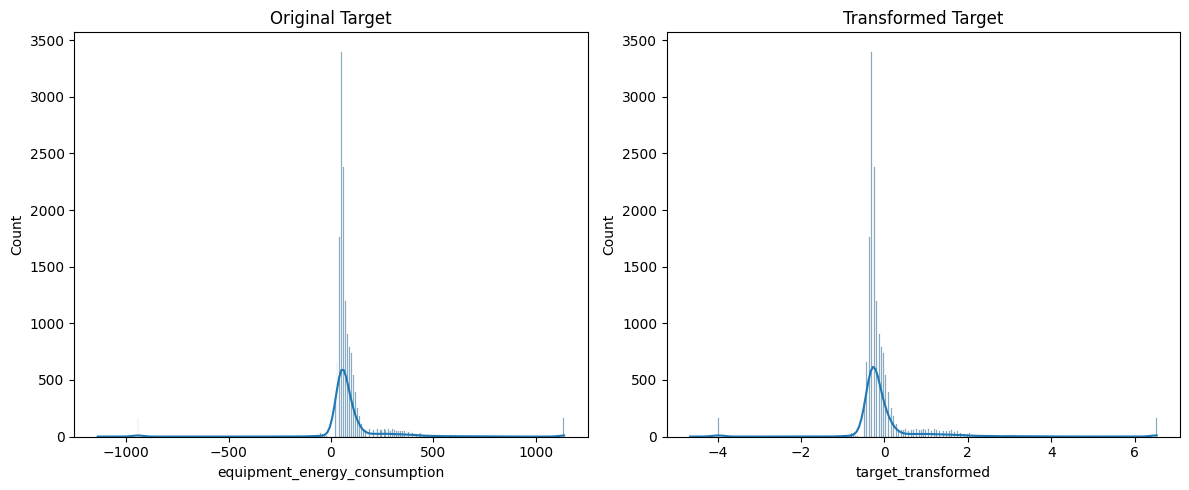

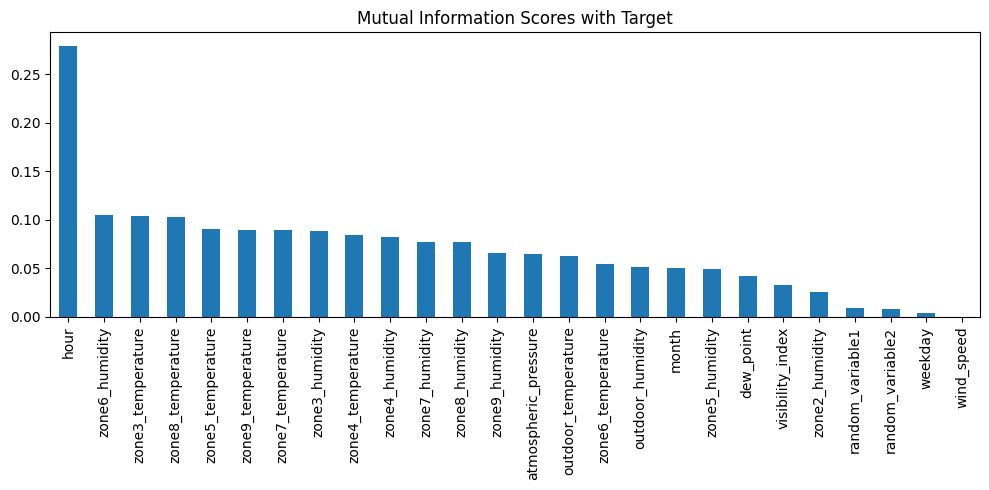

Top Feature Interactions (Correlated with target):
hour * zone6_humidity: nan
hour * zone3_temperature: nan
hour * zone8_temperature: nan
hour * zone5_temperature: nan
zone6_humidity * zone3_temperature: nan
zone6_humidity * zone8_temperature: nan
zone6_humidity * zone5_temperature: nan
zone3_temperature * zone8_temperature: nan
zone3_temperature * zone5_temperature: nan
zone8_temperature * zone5_temperature: nan


 94%|=================== | 14997/15945 [00:17<00:01]       

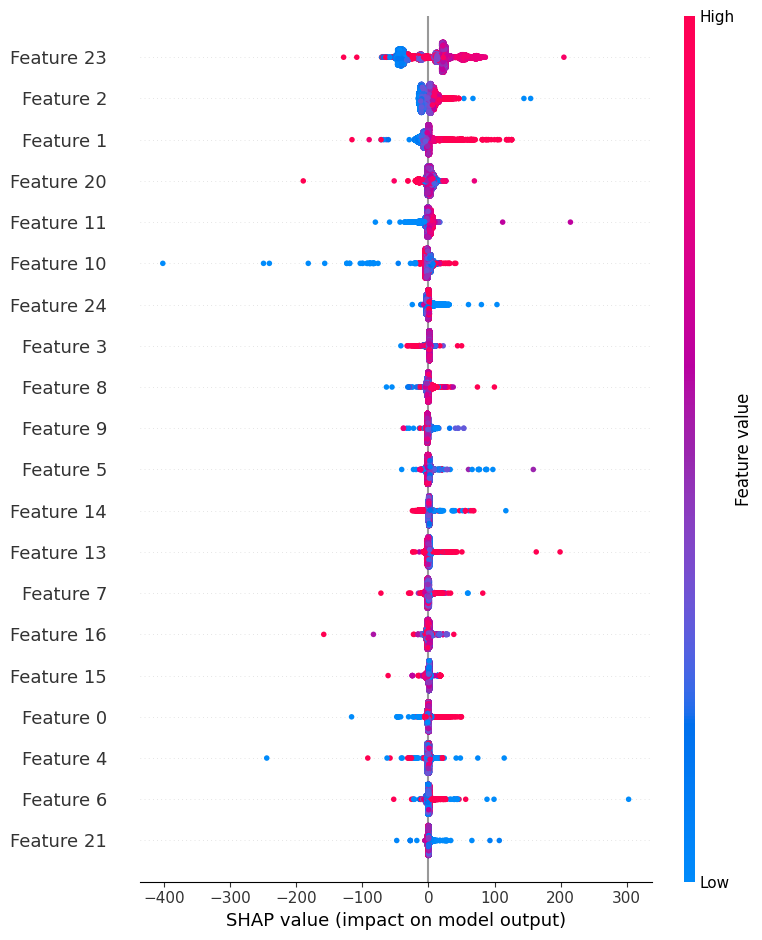

<ipython-input-16-9a7f249efbb1>:87: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_ts = df.set_index('timestamp').resample('H')[target].mean()


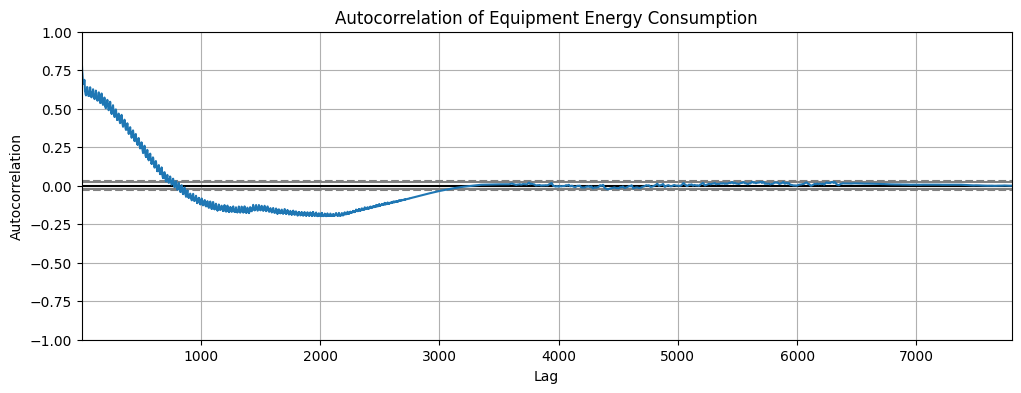

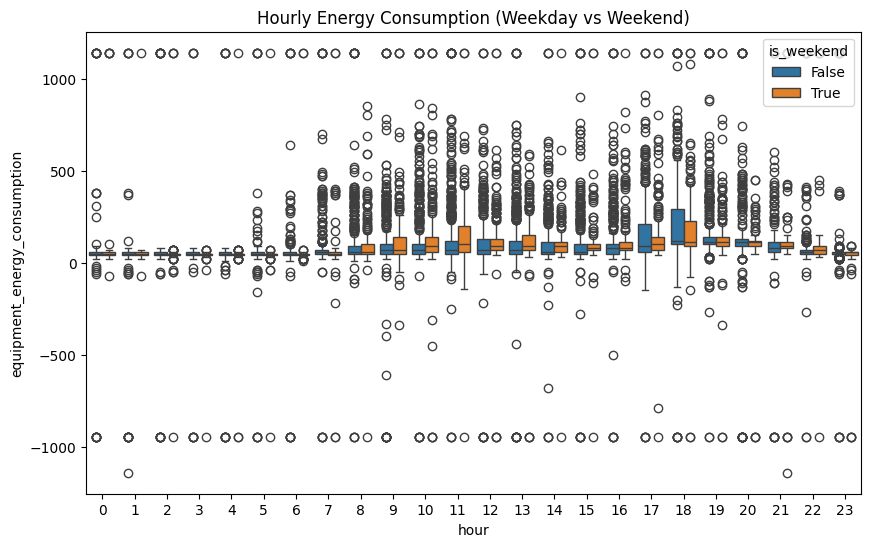

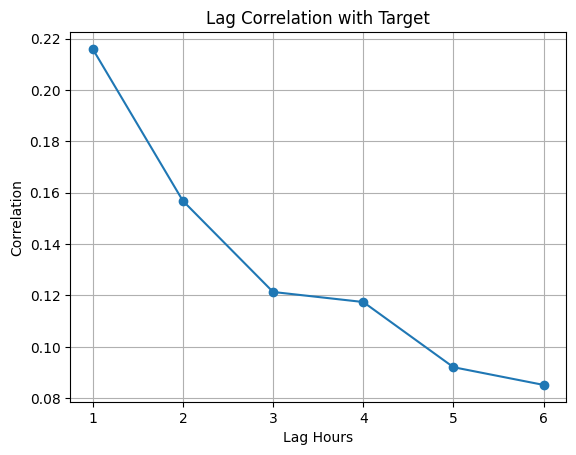

Cluster Profiles:
         zone2_humidity  zone3_temperature  zone3_humidity  zone4_temperature  \
cluster                                                                         
0                 37.22              20.47           36.60              19.38   
1                 39.31              22.98           36.58              21.49   
2                 42.73              20.97           42.85              19.22   
3                 39.23              21.74           38.20              20.34   

         zone4_humidity  zone5_temperature  zone5_humidity  zone6_temperature  \
cluster                                                                         
0                 34.57              18.01           49.33               1.45   
1                 36.59              20.20           48.09              10.08   
2                 44.47              18.43           55.25               6.93   
3                 36.65              19.31           49.71               5.93   

        

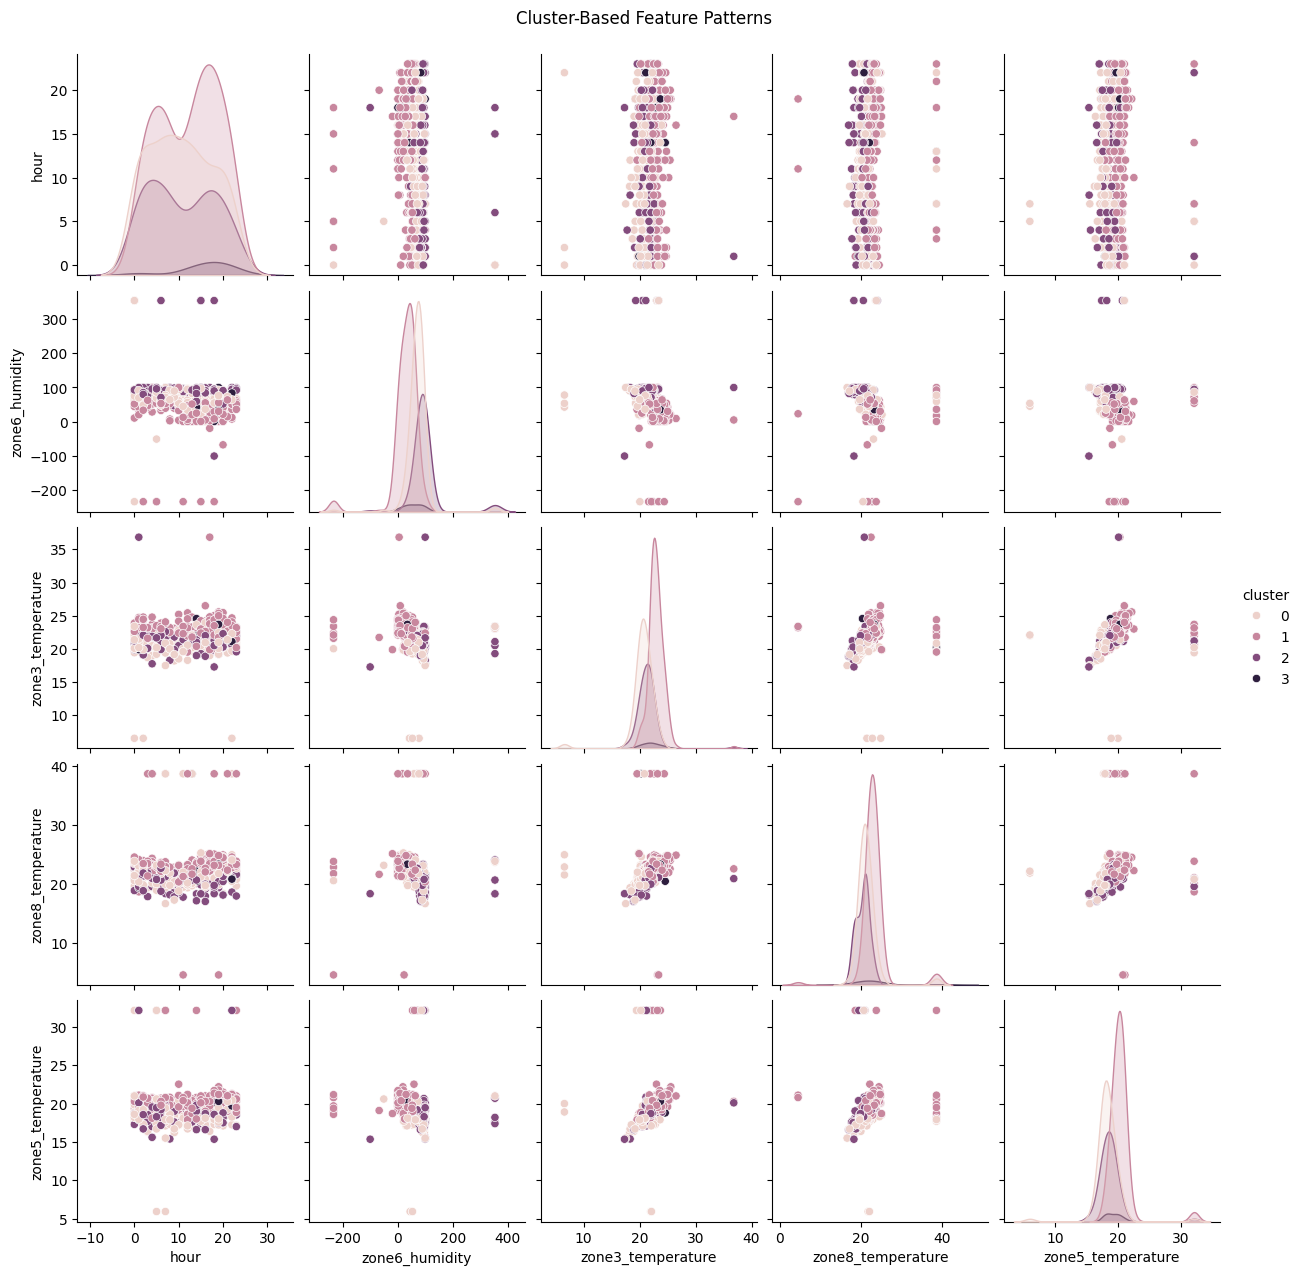

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from itertools import combinations
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from sklearn.cluster import KMeans


# Load and process
df = pd.read_excel('data.xlsx')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.weekday
df['is_weekend'] = df['weekday'] >= 5
df['month'] = df['timestamp'].dt.month

# Numerical and target separation
target = 'equipment_energy_consumption'
# Ensure 'equipment_energy_consumption' is numeric
df[target] = pd.to_numeric(df[target], errors='coerce')
# Drop rows with errors after conversion
# df = df[df['equipment_energy_consumption'] != 'error']  # Already handled by pd.to_numeric

# Drop rows with NaNs in the target to prevent issues later
df.dropna(subset=[target], inplace=True)

# Select numeric features, EXCLUDING the target column
numeric_features = df.select_dtypes(include=np.number).columns.drop(target)

# === 1. Power Transform Target Check ===
pt = PowerTransformer()
df['target_transformed'] = pt.fit_transform(df[[target]])

fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df[target], kde=True, ax=ax[0]).set(title='Original Target')
sns.histplot(df['target_transformed'], kde=True, ax=ax[1]).set(title='Transformed Target')
plt.tight_layout()
plt.show()

# === 2. Mutual Information Analysis ===
df_mi = df[numeric_features.tolist() + [target]].dropna()

mi = mutual_info_regression(df_mi[numeric_features], df_mi[target])
mi_scores = pd.Series(mi, index=numeric_features).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
mi_scores.plot(kind='bar')
plt.title("Mutual Information Scores with Target")
plt.tight_layout()
plt.show()

# === 3. Feature Interaction Analysis ===
top_features = mi_scores.head(5).index
interaction_scores = {}
for f1, f2 in combinations(top_features, 2):
    interaction = df[f1] * df[f2]
    corr = np.corrcoef(interaction, df[target])[0, 1]
    interaction_scores[f"{f1} * {f2}"] = corr

print("Top Feature Interactions (Correlated with target):")
for k, v in sorted(interaction_scores.items(), key=lambda x: abs(x[1]), reverse=True):
    print(f"{k}: {v:.3f}")

# === 4. SHAP Explainability ===
X = df[numeric_features]
# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X = imputer.fit_transform(X)

model = GradientBoostingRegressor().fit(X, df[target])
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.summary_plot(shap_values, X)

# === 5. Time-based Autocorrelation ===
df_ts = df.set_index('timestamp').resample('H')[target].mean()
df_ts = df_ts.interpolate()

plt.figure(figsize=(12,4))
autocorrelation_plot(df_ts)
plt.title("Autocorrelation of Equipment Energy Consumption")
plt.show()

# === 6. Seasonal Analysis ===
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='hour', y=target, hue='is_weekend')
plt.title("Hourly Energy Consumption (Weekday vs Weekend)")
plt.show()

# === 7. Lag Feature Creation and Correlation ===
df_ts = df_ts.reset_index(drop=True)

for lag in range(1, 7):
    # Calculate lagged values
    df[f'target_lag_{lag}'] = df[target].shift(lag)

lag_corrs = [df[f'target_lag_{lag}'].corr(df[target]) for lag in range(1, 7)]
plt.plot(range(1, 7), lag_corrs, marker='o')
plt.title("Lag Correlation with Target")
plt.xlabel("Lag Hours")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()

# === 8. Cluster Profiling (KMeans & Segment Averages) ===
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X_imputed = imputer.fit_transform(df[numeric_features])
X_scaled = StandardScaler().fit_transform(X_imputed)
df['cluster'] = KMeans(n_clusters=4, random_state=42).fit_predict(X_scaled)
profile = df.groupby('cluster')[numeric_features.tolist() + [target]].mean()
print("Cluster Profiles:")
print(profile.round(2))
sns.pairplot(df.sample(500), hue='cluster', vars=top_features)
plt.suptitle("Cluster-Based Feature Patterns", y=1.02)
plt.show()


In [17]:
!pip install lightgbm shap optuna scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 24.7 MB/s eta 0:00:00


Shape: (15945, 29)
Data Types:
 timestamp                       datetime64[ns]
equipment_energy_consumption           float64
lighting_energy                         object
zone1_temperature                       object
zone1_humidity                          object
zone2_temperature                       object
zone2_humidity                         float64
zone3_temperature                      float64
zone3_humidity                         float64
zone4_temperature                      float64
zone4_humidity                         float64
zone5_temperature                      float64
zone5_humidity                         float64
zone6_temperature                      float64
zone6_humidity                         float64
zone7_temperature                      float64
zone7_humidity                         float64
zone8_temperature                      float64
zone8_humidity                         float64
zone9_temperature                      float64
zone9_humidity              

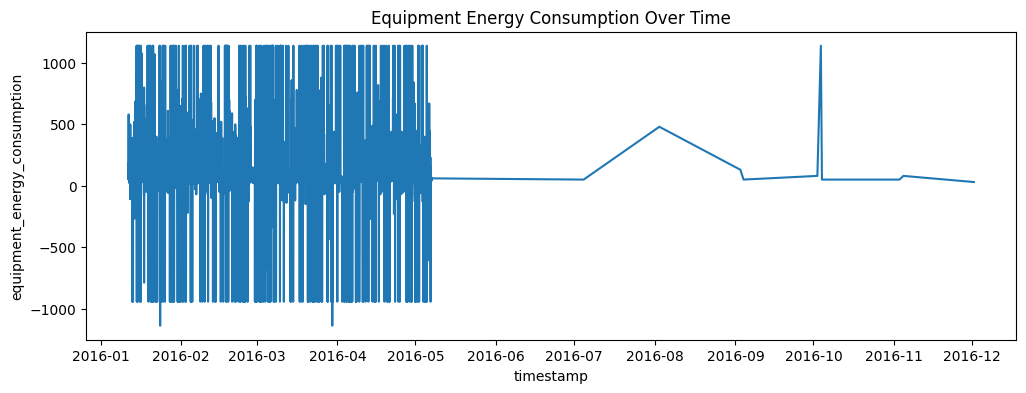

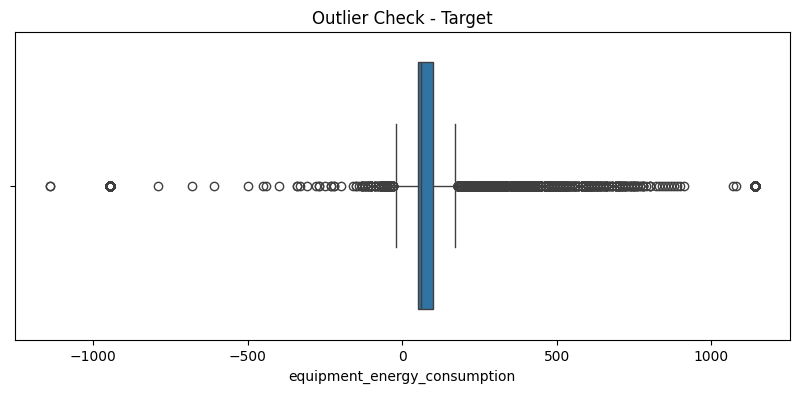

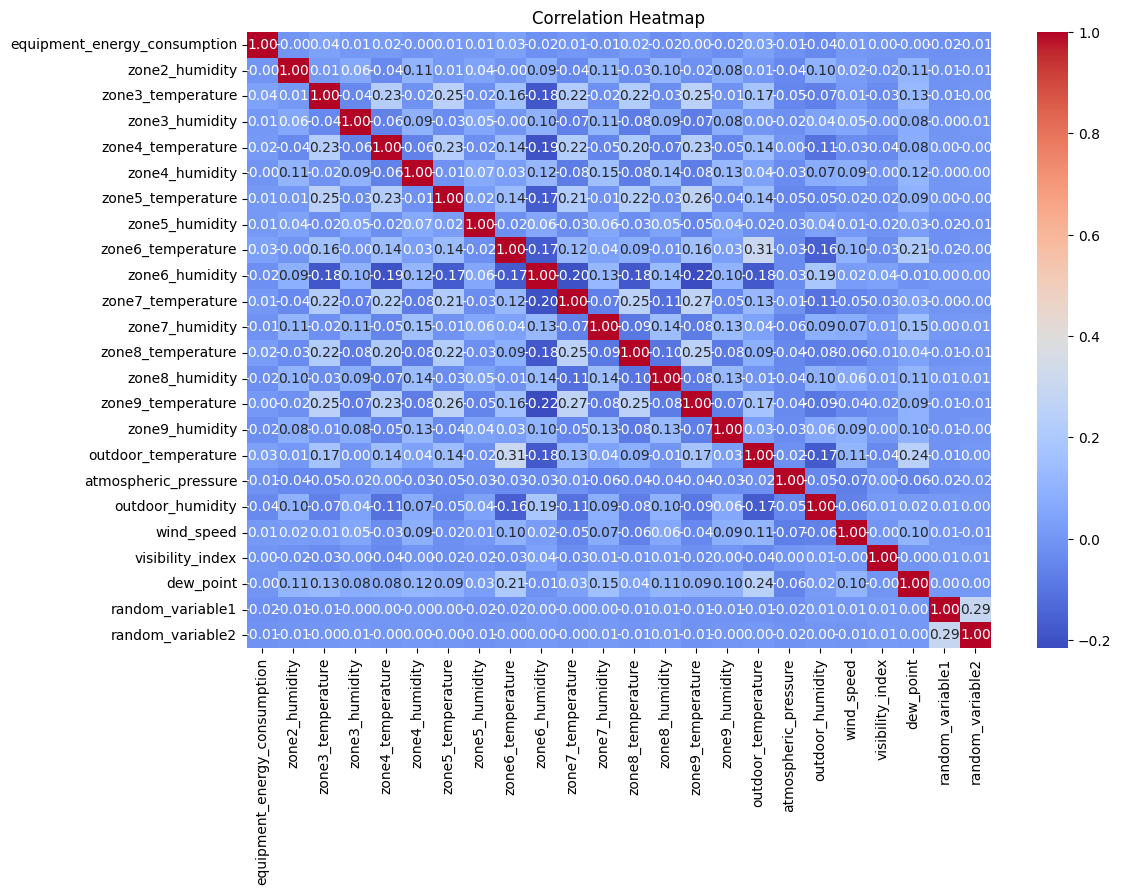

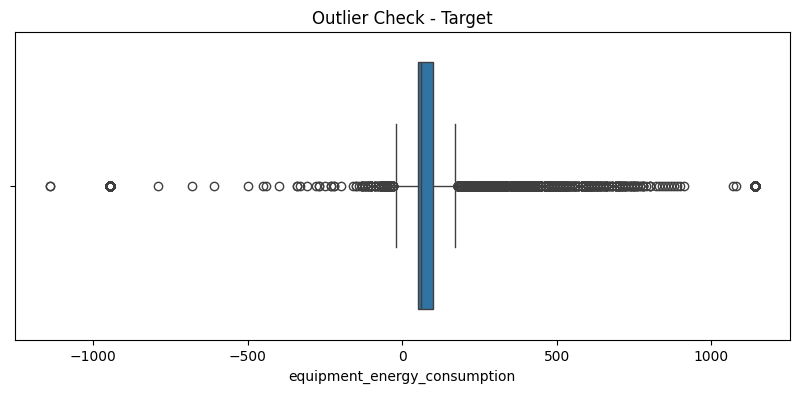

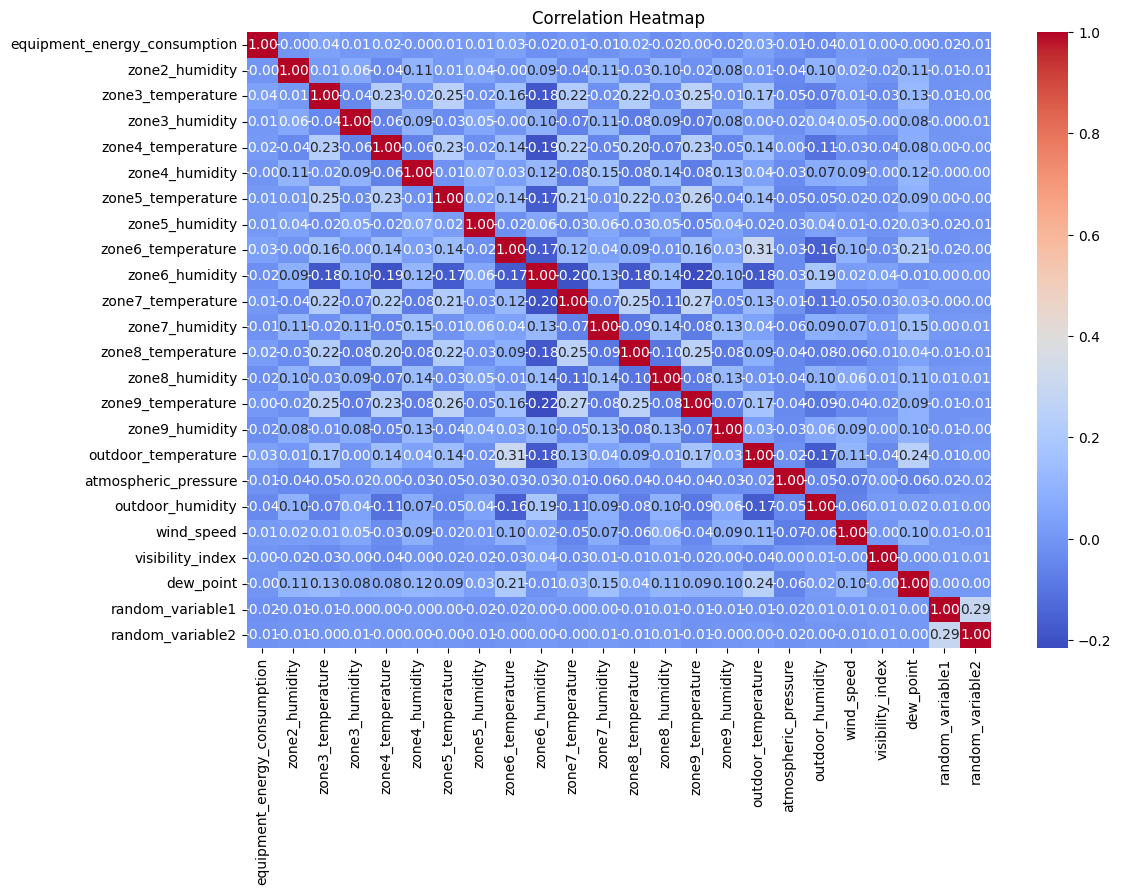

Training shape: (1599, 34)
Test shape: (400, 34)


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

# === Load Data ===
df = pd.read_excel('data.xlsx')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# --- Convert 'equipment_energy_consumption' to numeric ---
# This line converts the 'equipment_energy_consumption' column to numeric,
# replacing any non-numeric values (like 'error') with NaN.
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')

# --- Drop rows with NaN in 'equipment_energy_consumption' ---
# This line removes rows where 'equipment_energy_consumption' is NaN
# to avoid the error when plotting.
df.dropna(subset=['equipment_energy_consumption'], inplace=True)

# === EDA ===
print("Shape:", df.shape)
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())
print("\nTarget Summary:\n", df['equipment_energy_consumption'].describe())

# Time trend of target
plt.figure(figsize=(12, 4))
sns.lineplot(x='timestamp', y='equipment_energy_consumption', data=df)
plt.title('Equipment Energy Consumption Over Time')
plt.show()

# Distribution and outliers
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='equipment_energy_consumption')
plt.title("Outlier Check - Target")
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Distribution and outliers
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='equipment_energy_consumption')
plt.title("Outlier Check - Target")
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# === Feature Engineering ===
df = df.sort_values('timestamp')
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

# Lag and rolling window features
for lag in range(1, 4):
    df[f'lag_{lag}'] = df['equipment_energy_consumption'].shift(lag)

df['rolling_mean_3'] = df['equipment_energy_consumption'].rolling(window=3).mean()
df['rolling_std_3'] = df['equipment_energy_consumption'].rolling(window=3).std()

# Drop early NaNs from lag/rolling
df.dropna(inplace=True)

# === Prepare Dataset ===
X = df.drop(columns=['timestamp', 'equipment_energy_consumption', 'random_variable1', 'random_variable2'])
y = df['equipment_energy_consumption']

# Convert non-numeric and impute
X = X.replace(['unknown', 'error'], np.nan)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values using SimpleImputer, but keep the index intact
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)

# Use imputed data for alignment
# Align target after transformation
y = y.loc[X_imputed.index]

# === Outlier Detection (Z-score) ===
z_scores = np.abs(zscore(X_imputed))

# Filter both X and y based on outlier detection
X_filtered = X_imputed[(z_scores < 3).all(axis=1)]
y_filtered = y.loc[X_filtered.index]

# === Feature Scaling ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)  # Scale the filtered data

# === Data Splitting ===
# Use standard train-test split or time-series split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_filtered, test_size=0.2, random_state=42, shuffle=False  # shuffle=False for time-order integrity
)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import RANSACRegressor, TheilSenRegressor, HuberRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_excel("data.xlsx")
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Time-based features
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

# Lag features
df.sort_values('timestamp', inplace=True)
for lag in range(1, 4):
    df[f'equipment_energy_lag{lag}'] = df['equipment_energy_consumption'].shift(lag)
#df.dropna(inplace=True) # Removing this line to handle NaNs later

# Drop uninformative columns
X = df.drop(columns=['timestamp', 'equipment_energy_consumption', 'random_variable1', 'random_variable2'])
y = df['equipment_energy_consumption']

# Handle missing/non-numeric
X = X.replace(['unknown', 'error', '???'], np.nan) # Replace '???' with NaN
X = X.apply(pd.to_numeric, errors='coerce')
X = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(X), columns=X.columns, index=df.index) # Keep original index

# The target variable should have the same index as X before imputation
y = df.loc[X.index, 'equipment_energy_consumption']

# Now, aligning target with X after imputation should work correctly:
y = y.loc[X.index]

# Split & scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "RANSAC": RANSACRegressor(),
    "TheilSen": TheilSenRegressor(),
    "Huber": HuberRegressor()
}

# Hyperparameters
param_grid = {
    "RANSAC": {"min_samples": [0.5, 0.75], "residual_threshold": [5, 10]},
    "TheilSen": {"max_subpopulation": [1e4, 1e5]},
    "Huber": {"epsilon": [1.35, 1.5, 1.75]}
}

# Train, evaluate and cross-validate
results = {}
for name, model in models.items():
    grid = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_root_mean_squared_error')
    grid.fit(X_train_scaled, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    cv_score = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='r2').mean()

    results[name] = {
        "Best Params": grid.best_params_,
        "Test RMSE": rmse,
        "Test R2": r2,
        "CV R2 Mean": cv_score
    }

# Print results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for k, v in metrics.items():
        print(f"{k}: {v}")

ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ransac.py", line 373, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2959, in validate_data
    y = check_array(y, input_name="y", **check_y_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/series.py", line 1031, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '???'
